<a href="https://colab.research.google.com/github/AdrianOjeda/clasificacion-inteligente-de-datos/blob/main/RegresionLogistica/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Logistica**

### **1.1 Fundamentos de la tecnica**

La regresión logística es un modelo estadístico y de machine learning que se utiliza para problemas de clasificación, especialmente cuando la variable dependiente es binaria (dos posibles resultados). Su objetivo es estimar la probabilidad de que ocurra un evento en función de variables independientes. E- s un método que permite modelar la relación entre una variable dependiente categórica (por ejemplo, éxito/fracaso, sí/no, 1/0) y un conjunto de variables independientes. En lugar de predecir valores continuos como la regresión lineal, este modelo estima probabilidades que siempre se encuentran en el rango [0,1].




# **1.2 Modelo natematico**

El modelo parte de una combinación lineal de las variables predictoras:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

Luego aplica la función logística:

$$
P(y=1|X) = \frac{1}{1 + e^{-z}}
$$

De esta forma, el resultado siempre se encuentra entre 0 y 1, lo que permite interpretarlo como una **probabilidad**.

**Estimación de Parámetros**

Los coeficientes $\beta$ no se estiman mediante mínimos cuadrados (como en regresión lineal), sino a través de **máxima verosimilitud**, buscando los valores que maximizan la probabilidad de observar los datos disponibles.

**Decisión de Clasificación**

Una vez obtenida la probabilidad, se define un **umbral de decisión** (comúnmente 0.5):

- Si $P(y=1|X) \geq 0.5$, se clasifica como clase positiva.  
- Si $P(y=1|X) < 0.5$, se clasifica como clase negativa.


Este umbral puede ajustarse según el problema (ej. mayor sensibilidad en diagnóstico médico).

**Extensiones**

- **Regresión logística multinomial**: para más de dos clases.
- **Regresión logística ordinal**: cuando las clases tienen un orden natural.
- **Regularización (L1/L2)**: para evitar sobreajuste y mejorar la generalización.

**Ventajas**

- Interpretabilidad: los coeficientes indican la influencia de cada variable en la probabilidad.
- Simplicidad y eficiencia computacional.
- Base para modelos más complejos (redes neuronales, modelos lineales generalizados).

**Limitaciones**

- Supone relación lineal entre predictores y log-odds.
- Puede ser insuficiente en problemas con fronteras de decisión muy complejas.
- Sensible a variables altamente correlacionadas.

**Aplicaciones Comunes**

- Clasificación de textos (spam, sentimiento).
- Predicción de abandono de clientes (churn).
- Diagnóstico médico.
- Detección de fraude.


# **1.3 Librerias**

En la implementación de la **regresión logística** utilizaremos las siguientes librerías y módulos de Python:

## Librerías principales

- **NumPy**  
  - Proporciona estructuras de datos eficientes (arrays) y funciones matemáticas.  
  - Se usará para operaciones numéricas y manejo de vectores/matrices.

- **Pandas**  
  - Facilita la manipulación y análisis de datos mediante estructuras como `DataFrame`.  
  - Se usará para cargar datasets y realizar transformaciones.

- **Matplotlib / Seaborn**  
  - Librerías de visualización.  
  - Se usarán para graficar distribuciones, curvas de decisión y métricas como la matriz de confusión.

- **Scikit-learn (sklearn)**  
  - Biblioteca de machine learning en Python.  
  - Proporciona clases y funciones para modelos, métricas y preprocesamiento.

## Clases y funciones específicas de Scikit-learn

- **`sklearn.linear_model.LogisticRegression`**  
  - Clase que implementa el modelo de regresión logística.  
  - Permite ajustar el modelo (`fit`), predecir (`predict`) y obtener probabilidades (`predict_proba`).

- **`sklearn.model_selection.train_test_split`**  
  - Función para dividir los datos en conjuntos de entrenamiento y prueba.  
  - Garantiza una evaluación justa del modelo.

- **`sklearn.preprocessing.StandardScaler`**  
  - Clase para normalizar/estandarizar variables.  
  - Mejora la estabilidad numérica y el rendimiento del modelo.

- **`sklearn.metrics`**  
  - Conjunto de funciones para evaluar modelos de clasificación:  
    - `accuracy_score`: exactitud.  
    - `precision_score`: precisión.  
    - `recall_score`: sensibilidad.  
    - `f1_score`: balance entre precisión y recall.  
    - `confusion_matrix`: matriz de confusión para visualizar errores.


# **1.4 Pipeline**

1.4.1 Preprocesamiento

Dimensiones del dataset: (569, 30)

Primeras filas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Resumen estadístico:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


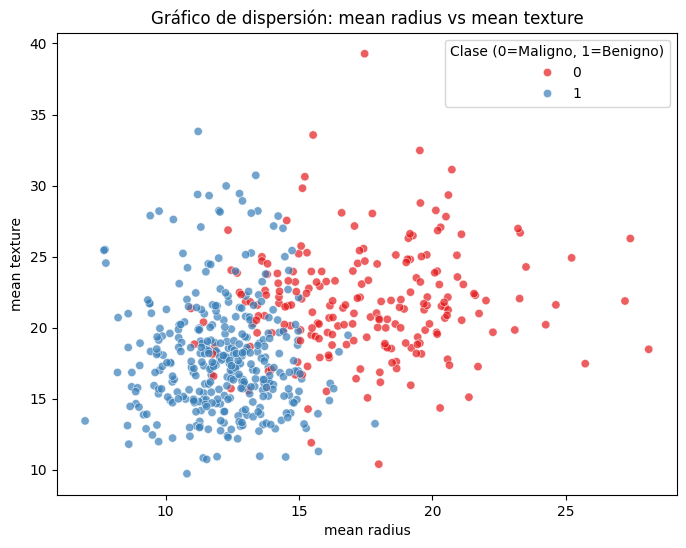

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cargamos un dataset clásico de sklearn
from sklearn.datasets import load_breast_cancer

# Cargar dataset Breast Cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Vista rápida del dataset
print("Dimensiones del dataset:", X.shape)
print("\nPrimeras filas:")
display(X.head())

# Análisis estadístico básico

print("\nResumen estadístico:")
display(X.describe())  # incluye avg, std, min, max, percentiles


# Gráfico de dispersión
# Seleccionamos dos variables para visualizar
feature_x = "mean radius"
feature_y = "mean texture"

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[feature_x], y=X[feature_y], hue=y, palette="Set1", alpha=0.7)
plt.title(f"Gráfico de dispersión: {feature_x} vs {feature_y}")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title="Clase (0=Maligno, 1=Benigno)")
plt.show()


1.4.2 Prediction

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalización de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


# Función de predicción


def predecir_patron(patron):
    """
    Recibe un patrón (lista o array con las características),
    aplica la misma normalización y devuelve la clase predicha.
    """
    # Convertir a array 2D
    patron = np.array(patron).reshape(1, -1)

    # Escalar con el mismo scaler usado en entrenamiento
    patron_scaled = scaler.transform(patron)

    # Obtener predicción
    clase_predicha = model.predict(patron_scaled)[0]
    probabilidad = model.predict_proba(patron_scaled)[0]

    print("Clase predicha:", clase_predicha)
    print("Probabilidades [Clase 0, Clase 1]:", probabilidad)

# Tomamos el primer patrón del conjunto de prueba
ejemplo = X_test.iloc[0].values
predecir_patron(ejemplo)


Clase predicha: 1
Probabilidades [Clase 0, Clase 1]: [0.1179591 0.8820409]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1.4.3 Model Evaluation

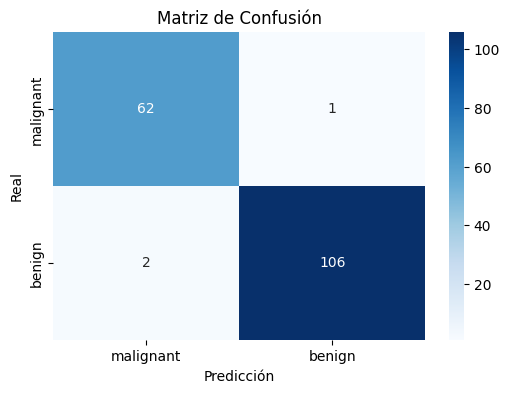

Matriz de Confusión:
 [[ 62   1]
 [  2 106]]

Accuracy del modelo: 0.9824561403508771


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Matriz de Confusión

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("Matriz de Confusión:\n", cm)

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy del modelo:", accuracy)


**- Matriz de Confusión:**
- Muestra cómo se distribuyen las predicciones correctas e incorrectas.
- Las diagonales representan aciertos (clase real = clase predicha).
- Los valores fuera de la diagonal representan errores de clasificación.

**- Accuracy (Exactitud):**
- Es la proporción de predicciones correctas sobre el total de casos.
- Se interpreta como el porcentaje de aciertos del modelo.
- Aunque es útil, puede ser engañoso en datasets desbalanceados (cuando una clase es mucho más frecuente que otra).


# **Referencias bibliograficas**

Wikipedia contributors. (s.f.). Regresión logística. En Wikipedia. Recuperado el 27 de noviembre de 2025, de https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

Pérez-Guerrero, E. E. (2024). Regresión logística: presentación y aspectos teóricos. En Bookdown. Recuperado el 27 de noviembre de 2025, de https://bookdown.org/edsaul_perez/regresion/Regresion_Logistica_Presentacion.html *italicized text*